In [1]:
%matplotlib notebook

In [2]:
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

from kafka import KafkaConsumer


In [36]:
consumer = KafkaConsumer('sessions', 
                         bootstrap_servers="master1:6667", 
                         auto_offset_reset='earliest', 
                         enable_auto_commit=True, 
                         value_deserializer=lambda x: x.decode('utf-8'), 
                         consumer_timeout_ms=10000)

records = []
for message in consumer:
    records.append(json.loads(message.value))

print(f"Records: {len(records)}")

Records: 235


In [38]:
records[0:4]

[{'Kind': 'm',
  'ClientID': 2,
  'Timestamp': 1540633637953,
  'Timestring': '2018-10-27T11:47:17+02:00',
  'SessionID': '092b77c3-585d-46e0-af40-e725f59efc66',
  'ID': 1,
  'Data': {'Values': 17, 'Errors': 0},
  'SentTimestamp': 1540633637962},
 {'Kind': 'm',
  'ClientID': 8,
  'Timestamp': 1540633638541,
  'Timestring': '2018-10-27T11:47:18+02:00',
  'SessionID': '36289fa3-a5cd-4f41-a655-ff43de9e893d',
  'ID': 1,
  'Data': {'Values': 70, 'Errors': 0},
  'SentTimestamp': 1540633638543},
 {'Kind': 'm',
  'ClientID': 2,
  'Timestamp': 1540633638759,
  'Timestring': '2018-10-27T11:47:18+02:00',
  'SessionID': '092b77c3-585d-46e0-af40-e725f59efc66',
  'ID': 2,
  'Data': {'Values': 47, 'Errors': 1},
  'SentTimestamp': 1540633638767},
 {'Kind': 'd',
  'ClientID': 9,
  'Timestamp': 1540633641900,
  'Timestring': '2018-10-27T11:47:21+02:00',
  'SessionID': 'cae3820a-245d-4ab1-bf03-4e3fcb16dd12',
  'ID': 1,
  'Data': {'Values': 79, 'Errors': 0},
  'SentTimestamp': 1540633641902}]

**Normalize timestamp**

In [39]:
df = json_normalize(records)
df["Timestamp0"] = (df["Timestamp"] - df["Timestamp"].loc[0:0][0])/ 1000.0
df["SentTimestamp0"] = (df["SentTimestamp"] - df["SentTimestamp"].loc[0:0][0]) / 1000.0

In [40]:
pd.options.display.max_rows = 60

In [41]:
df

,ClientID,Data.Errors,Data.Values,ID,Kind,SentTimestamp,SessionID,Timestamp,Timestring,Timestamp0,SentTimestamp0
0,2,0,17,1,m,1540633637962,092b77c3-585d-46e0-af40-e725f59efc66,1540633637953,2018-10-27T11:47:17+02:00,0.000,0.000
1,8,0,70,1,m,1540633638543,36289fa3-a5cd-4f41-a655-ff43de9e893d,1540633638541,2018-10-27T11:47:18+02:00,0.588,0.581
2,2,1,47,2,m,1540633638767,092b77c3-585d-46e0-af40-e725f59efc66,1540633638759,2018-10-27T11:47:18+02:00,0.806,0.805
3,9,0,79,1,d,1540633641902,cae3820a-245d-4ab1-bf03-4e3fcb16dd12,1540633641900,2018-10-27T11:47:21+02:00,3.947,3.940
4,5,0,58,1,m,1540633641928,3878ccb5-2929-494c-acf0-59adaf5d6a6f,1540633641918,2018-10-27T11:47:21+02:00,3.965,3.966
5,7,0,27,1,m,1540633642079,62616cbe-067e-45ff-8265-cf0f008d1a69,1540633642069,2018-10-27T11:47:22+02:00,4.116,4.117
6,0,0,70,1,m,1540633643696,d8bc45d5-5dae-4fd1-81b2-bb1090f932c0,1540633643688,2018-10-27T11:47:23+02:00,5.735,5.734
7,3,0,88,1,d,1540633644049,cbfd601d-a039-4c20-bc53-72737e1d5276,1540633644042,2018-10-27T11:47:24+02:00,6.089,6.087
8,9,0,98,2,d,1540633644050,cae3820a-245d-4ab1-bf03-4e3fcb16dd12,1540633644049,2018-10-27T11:47:24+02:00,6.096,6.088
9,7,0,29,2,m,1540633644444,62616cbe-067e-45ff-8265-cf0f008d1a69,1540633644435,2018-10-27T11:47:24+02:00,6.482,6.482


<IPython.core.display.Javascript object>


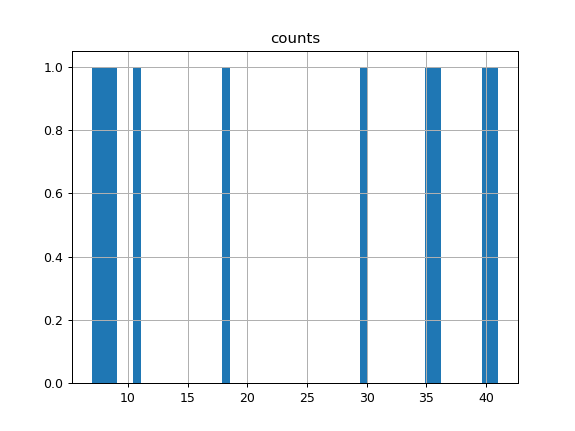

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125ad57f0>]],
      dtype=object)

In [42]:
hist = df.groupby(by="SessionID").size().reset_index(name='counts').sort_values(by="counts")
hist.hist(bins=50)

In [9]:
df["s"] = 1
df.head()

,ClientID,Data.Errors,Data.Values,ID,Kind,SentTimestamp,SessionID,Timestamp,Timestring,Timestamp0,SentTimestamp0,s
0,2,0,17,1,m,1540629607934,e4dd7a47-5363-4ee2-bfd1-208dc9be9941,1540629607927,2018-10-27T10:40:07+02:00,0,0,1
1,8,0,70,1,m,1540629608512,874d2d11-83ad-4f2c-95f1-a6938132a61e,1540629608509,2018-10-27T10:40:08+02:00,582,578,1
2,2,1,47,2,m,1540629608733,e4dd7a47-5363-4ee2-bfd1-208dc9be9941,1540629608724,2018-10-27T10:40:08+02:00,797,799,1
3,9,0,79,1,d,1540629611870,892c2314-8fa7-4561-b516-c8408fd0c1a0,1540629611869,2018-10-27T10:40:11+02:00,3942,3936,1
4,5,0,58,1,m,1540629611893,28e0302d-41e2-4c14-9e39-3f8ec651d3eb,1540629611883,2018-10-27T10:40:11+02:00,3956,3959,1


<IPython.core.display.Javascript object>


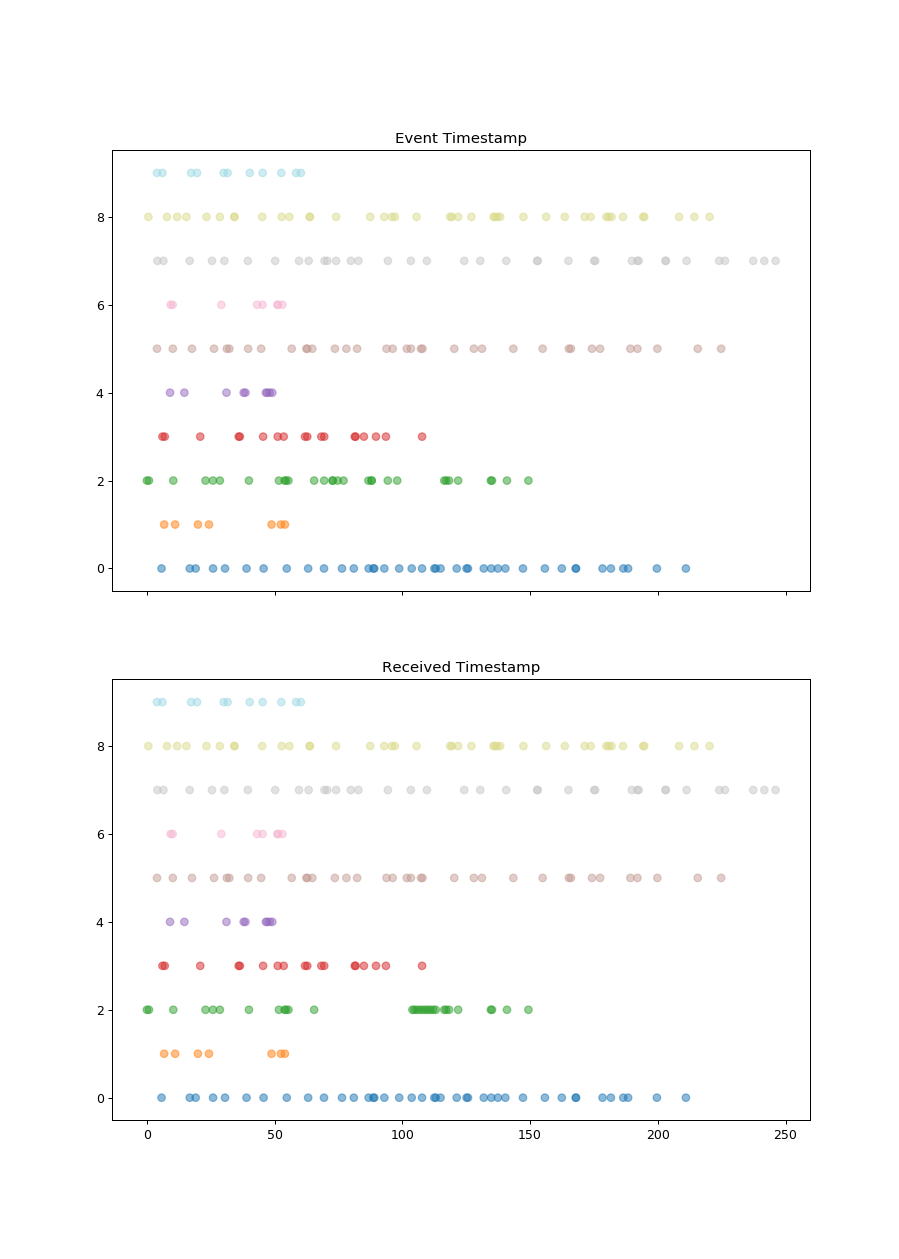

In [43]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,figsize=(10,14))

ax1.scatter( x='Timestamp0', y='ClientID', c='ClientID', data=df, marker='o', alpha=0.5, cmap="tab20")
ax1.title.set_text('Event Timestamp')

ax2.scatter( x='SentTimestamp0',y='ClientID', c='ClientID', data=df, marker='o', alpha=0.5, cmap="tab20")
ax2.title.set_text('Received Timestamp')

ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()